# Midterm 2 Review (Part II)

## ECE204 Data Science & Engineering
### This notebook contains practice questions for Midterm 2. The following topics are covered:
- KMeans Clustering
- PCA

## K Means

> ## Question 1
> This question involves KMeans clustering.
> We have a cleaner version of the blobs dataset from last part, `blobs_2.csv`. <br>
> Your objective is to run KMeans (with random_state=42) on the data, and find the folloing: <br>
> 1. The total number of points that belong to each cluster.
> 2. Which cluster center is the point [2, 2] closest to? Find the distance of this point to the nearest cluster center. <br>
>
>
> Solve the problem using the following steps:
> 1. Run KMeans on the data with `n_clusters=2`, since it looks like there are 2 distinct groups. Make sure to set `random_state=42`.
> 2. Predict the cluster assignment for each data point. Using this, find out the number of points that belong to each cluster.
> 3. Find the distance of the point [2, 2] to each cluster center, and report the smallest distance. (Alternatively, you could predict the cluster assignment for this point, and then find the distance to that point only.)


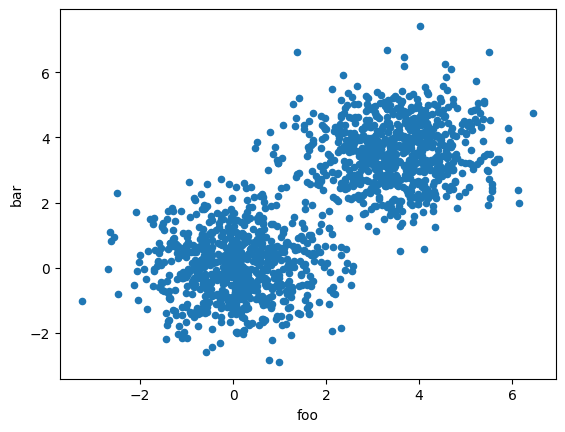

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv('blobs_2.csv')
df.plot.scatter(x="foo", y="bar") 

In [2]:
# Your code here

In [3]:
# Solution - Part 1
km = KMeans(n_clusters=2, random_state = 42)
y_hat =km.fit(df).predict(df)

#y = km.fit_predict(df)
print("No. of points in cluster 1:", sum(y_hat))
print("No. of points in cluster 2:", len(y_hat) - sum(y_hat))

No. of points in cluster 1: 753
No. of points in cluster 2: 760


In [4]:
# Solution - Part 2
import numpy as np

new_point = np.array([2, 2])

distances = [np.linalg.norm(c - new_point) for c in km.cluster_centers_]

print("Distance of point (2, 2) to each cluster center:", distances)
print("Prediction for point (2, 2) : ", km.predict([[2, 2]]))

# Both prediction and calculation of distance to cluster centers tell us that [2, 2] lies closer to the Second Cluster.

Distance of point (2, 2) to each cluster center: [2.7530836203918896, 2.150707708041291]
Prediction for point (2, 2) :  [1]


c:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


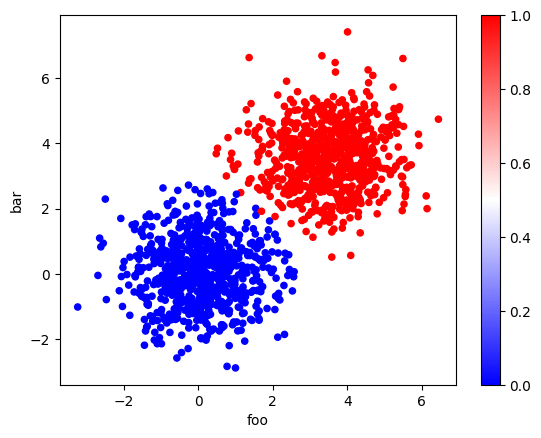

In [5]:
df.plot.scatter(x="foo", y="bar", c= y_hat, cmap='bwr');

## PCA

## Question 2
> Read in the dataset `cars.csv`. We want approximate this dataset with only 2 dimensions. You can use Principal component analysis (PCA) to do dimensionality reduction.
>
> Perform PCA on this dataset. While doing this, only numeric columns will be allowed. Your objective is to find out the following:

> 1. ** What is the standard deviation of each column in the original dataset?**
> 2. ** What is the total explained variance after reducing the data to 2 dimensions **
> 3. Each column has a different scale, and very different standard deviations. **Standarize the data, and then find out what is the total explained variance after reducing the data to 2 dimensions**. Reason about why there is a difference in the two results.
>
> Solve the problem using the following steps: <br>
> 1. Filter out the non-numeric columns out of the dataframe. We will perform PCA on numeric data only.
> 2. Find the standard deviation of each column. (Recall that there is a pandas method for this)
> 3. Run PCA on the data to reduce it to 2 dimensions, and check the total explained vairance.
> 4. Use `StandardScaler` to normalize the original data, and then run PCA to reduce the dimensions, and check the total explained variance 

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970


In [7]:
# Your code goes here
df.std()

TypeError: could not convert string to float: 'chevrolet chevelle malibu'

In [8]:
# Solution
df.describe()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,15.541327,5.471939,194.411990,104.469388,23.445918,2977.584184,1976.051020
std,2.758864,1.705783,104.644004,38.491160,7.805007,849.402560,3.788858
min,8.000000,3.000000,68.000000,46.000000,9.000000,1613.000000,1970.000000
25%,13.775000,4.000000,105.000000,75.000000,17.000000,2225.250000,1973.000000
50%,15.500000,4.000000,151.000000,93.500000,22.750000,2803.500000,1976.000000
75%,17.025000,8.000000,275.750000,126.000000,29.000000,3614.750000,1979.000000
max,24.800000,8.000000,455.000000,230.000000,46.600000,5140.000000,1982.000000


In [16]:
cols = ['Acceleration', 'Cylinders', 'Displacement', 'Horsepower',
       'Miles_per_Gallon', 'Weight_in_lbs', 'Year']

df = df[cols]
X = df.values

print(X)
df.head()

[[  12.     8.   307.  ...   18.  3504.  1970. ]
 [  11.5    8.   350.  ...   15.  3693.  1970. ]
 [  11.     8.   318.  ...   18.  3436.  1970. ]
 ...
 [  11.6    4.   135.  ...   32.  2295.  1982. ]
 [  18.6    4.   120.  ...   28.  2625.  1982. ]
 [  19.4    4.   119.  ...   31.  2720.  1982. ]]


,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,3504,1970
1,11.5,8,350.0,165.0,15.0,3693,1970
2,11.0,8,318.0,150.0,18.0,3436,1970
3,12.0,8,304.0,150.0,16.0,3433,1970
4,10.5,8,302.0,140.0,17.0,3449,1970


In [17]:
# Performing PCA, without any preprocessing

pca = PCA(n_components=2)

X_low = pca.fit_transform(df)
(pca.explained_variance_ratio_).sum()

0.999599169664194

In [18]:
# Performing PCA, but preprocess to normalize each feature

norm = StandardScaler()
X_norm = norm.fit_transform(df) # Let's call the normalized dataset Y

pca = PCA(n_components=2)
X_norm_low = pca.fit_transform(X_norm)

(pca.explained_variance_ratio_).sum()

0.8394028030165347

In [19]:
X_norm.std()

1.0

In [22]:
df = df[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'Miles_per_Gallon', 'Weight_in_lbs', 'Year']]
X = df.values
pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())

norm = StandardScaler()
X_norm = norm.fit_transform(X) 

pca = PCA(n_components=2)
X_norm_low = pca.fit_transform(X_norm)

print(pca.explained_variance_ratio_.sum())

0.999599169664194
0.8394028030165347
